Hello! I'll continue with the dataset for breast cancer diagnostics.

In [1]:
#importing libraries
from pandas import DataFrame
import numpy as np
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split

import sklearn.metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.datasets import load_breast_cancer 

%matplotlib inline

First, I'll get the data and a corresponding response variable (whether a person was diagnosed with cancer).

In [2]:
data = load_breast_cancer()

df_data = DataFrame(data=data['data'], columns = data['feature_names']).dropna()
df_target = DataFrame(data=data['target'])

All predictors are real numbers.

In [3]:
df_data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

Some brief statistics for the explanatory variables.

In [4]:
df_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Then I'll divide my data into testing and training sets and fit the model to the data.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_data.values, df_target.values, test_size = .2)

classifier = RandomForestClassifier(n_estimators=25)
classifier = classifier.fit(x_train,y_train.ravel())

pred = classifier.predict(x_test)

Here is the confusion matrix...

In [6]:
sklearn.metrics.confusion_matrix(y_test, pred)

array([[41,  4],
       [ 4, 65]], dtype=int64)

and the accuracy score.

In [7]:
sklearn.metrics.accuracy_score(y_test, pred)

0.92982456140350878

Here are all the features ranged by their relative importance. 

When diagnosing cancer, one should take careful look at extreme cases (denoted with 'worst'), since they play an important role in determining whether a patient has cancer.

In [8]:
from operator import itemgetter

sorted(list(zip(data['feature_names'], classifier.feature_importances_)), key=itemgetter(1), reverse = True)

[('worst area', 0.20274344597574584),
 ('worst concave points', 0.15439256956644468),
 ('worst perimeter', 0.11979697143080098),
 ('mean concave points', 0.11641639219592299),
 ('worst radius', 0.077773781147722779),
 ('area error', 0.056741588602723741),
 ('mean concavity', 0.052052152677519808),
 ('worst concavity', 0.037763462275561689),
 ('radius error', 0.0289404665566249),
 ('mean area', 0.018020150210666285),
 ('concavity error', 0.017516084570081639),
 ('worst smoothness', 0.017080280086414951),
 ('worst compactness', 0.013494034467753784),
 ('mean radius', 0.0095594467501668567),
 ('mean smoothness', 0.0093795959782439139),
 ('worst texture', 0.0078779502721108945),
 ('mean compactness', 0.0065795952049284515),
 ('mean texture', 0.0065469687335510778),
 ('worst symmetry', 0.006192140515629543),
 ('concave points error', 0.0055541094975112794),
 ('fractal dimension error', 0.0049858346613186767),
 ('mean symmetry', 0.0048483345419939325),
 ('smoothness error', 0.004608565249801

25 tress in a random forest is actually a bit extreme, around 10 should be good enough.

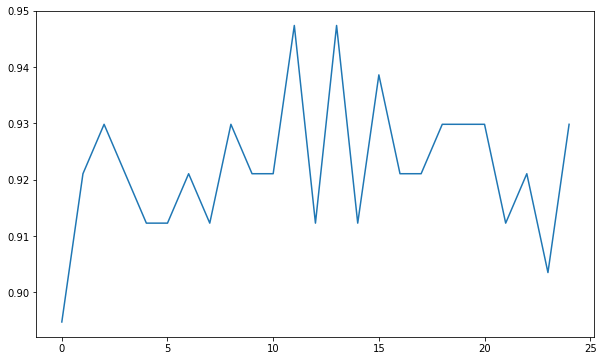

In [9]:
trees = range(25)
accuracy = np.zeros(25)

for idx in range(len(trees)):
   classifier = RandomForestClassifier(n_estimators=idx + 1)
   classifier = classifier.fit(x_train,y_train.ravel())
   predictions = classifier.predict(x_test)
   accuracy[idx] = sklearn.metrics.accuracy_score(y_test, predictions)

plt.figure(figsize=[10,6])
plt.cla()
plt.plot(trees, accuracy)